Define functions to do the normalisation

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 14 09:54:28 2021

Clustering exercise using fish measurements

@author: napi
"""

import pandas as pd
import numpy as np
import sklearn.cluster as cluster

import matplotlib.pyplot as plt
%matplotlib inline

def norm(array):
    """ Returns array normalised to [0,1] """

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array - min_val) / (max_val - min_val)
    
    return scaled


def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

Read in and normalise

In [3]:
# reading the file and basic statistics
df_fish = pd.read_csv("fish_measurements.csv", header=[0,1])
print(df_fish.describe())
print(df_fish.corr())
print()

# normalise result and inspect results
df_fish = norm_df(df_fish)
print(df_fish.describe())
print()


            weight lower jaw fork length fork length total length     height  \
                 g                    cm          cm           cm         cm   
count    85.000000             85.000000   85.000000    85.000000  85.000000   
mean    432.994118             27.338824   29.557647    33.120000  28.076471   
std     379.685386             11.289450   12.185045    13.197292  10.351543   
min       6.700000              9.300000    9.800000    10.800000  14.500000   
25%     120.000000             19.400000   21.000000    23.700000  16.900000   
50%     390.000000             28.400000   30.700000    35.000000  27.100000   
75%     650.000000             32.700000   36.000000    40.600000  39.200000   
max    1650.000000             59.000000   63.400000    68.000000  44.500000   

           width  
              cm  
count  85.000000  
mean   12.865882  
std     2.117476  
min     8.700000  
25%    11.000000  
50%    13.700000  
75%    14.700000  
max    16.100000  
         

Plot a few combinations of attributes (using a function)

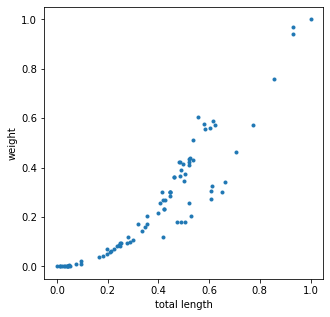

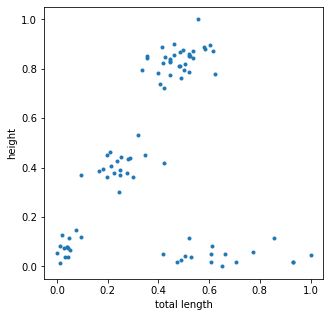

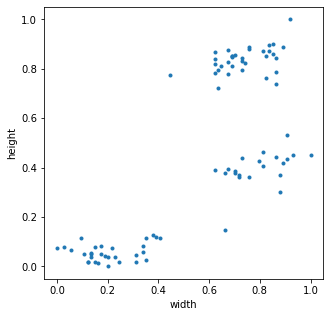

In [4]:
def makeplot(df, col1, col2):
    """
    Produces a square plot of two columns of dataframe df using small circle 
    symbols.
    """
    
    plt.figure(figsize=(5.0,5.0))
    plt.plot(df[col1], df[col2], "o", markersize=3)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
    
# exploratory plots
makeplot(df_fish, "total length", "weight")
makeplot(df_fish, "total length", "height")
makeplot(df_fish, "width", "height")

Total length vs. weight splits data neatly into four clusters, going for that.

Setting up and executing kmeans clustering

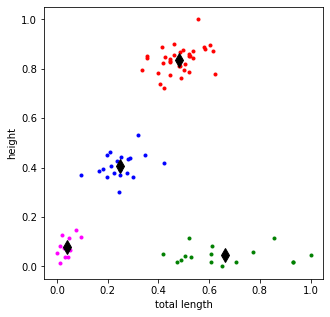

In [5]:
####### kmeans set up the clusterer, 4 expected clusters
kmeans = cluster.KMeans(n_clusters=4)

# extract columns for fitting
df_fit = df_fish[["total length", "height"]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df_fit["total length"][labels==l], df_fit["height"][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("total length")
plt.ylabel("height")
plt.show()

Agglomorative clustering

In [ ]:
##### setting up agglomerative clustering for 4 clusters
ac = cluster.AgglomerativeClustering(n_clusters=4)

# carry out the fitting
ac.fit(df_fit)

labels = ac.labels_

# The clusterer does not return cluster centres, but they are easily computed
xcen = []
ycen = []
for ic in range(4):
    xc = np.average(df_fit["total length"][labels==ic])
    yc = np.average(df_fit["height"][labels==ic])
    xcen.append(xc)
    ycen.append(yc)

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green", "magenta"]
for l in range(0,4):     # loop over the different labels
    plt.plot(df_fit["total length"][labels==l], df_fit["height"][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    plt.plot(xcen[ic], ycen[ic], "dk", markersize=10)
    
plt.xlabel("total length")
plt.ylabel("height")
plt.show()


###### writing labels into df_fish, sorting and exporting as excel file
df_fish["labels"] = labels
df_fish = df_fish.sort_values(["labels"], ignore_index=True)
df_fish.to_excel("fish_clusters.xlsx")